# Development

This notebook is meant for developing the bubble bouncing simulation code.

## 0 Packages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.sparse import diags, kron, identity, csr_matrix

## 1 Sparse matrix?

I've seen people using sparse matrix to formulate differential equations. Is it faster? Here, let's give it a test. 

The example task is to compute the laplacian of $h$:

$$
\nabla^2 h = \frac{\partial^2 h}{\partial x^2} + \frac{\partial^2 h}{\partial y^2}
$$

The most straightforward method is to compute the $x$ and $y$ terms separately, then sum them. 

In [25]:
# prepare the data
N = 100
h = np.random.rand(N, N)

# compute dx and dy 
global dx, dy
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
dx = np.gradient(X, axis=1, edge_order=2)
dy = np.gradient(Y, axis=0, edge_order=2)

# compute the Laplacian operator
global L2D
# 1D Laplacian matrix for finite difference
diagonals = [-2 * np.ones(N), np.ones(N-1), np.ones(N-1)]
L1D = diags(diagonals, [0, -1, 1], format="csr") / dx**2

# 2D Laplacian using Kronecker product
L2D = kron(identity(N), L1D) + kron(L1D, identity(N))

In [22]:
def laplacian(h):
    """
    Compute the Laplacian of a 2D array using finite differences.
    """
    d2hdx = np.gradient(np.gradient(h, axis=1, edge_order=2), axis=1, edge_order=2) / dx**2
    d2hdy = np.gradient(np.gradient(h, axis=0, edge_order=2), axis=0, edge_order=2) / dy**2
    return d2hdx +d2hdy

In [26]:
def laplacian_sparse(h):
    """
    Compute the Laplacian of a 2D array using sparse matrix representation.
    """
    
    return L2D @ h.flatten()

In [28]:
t0 = time.time()
for i in range(10000):
    laplacian(h)
t1 = time.time()
print(f"np.gradient takes {t1 - t0:.2f} seconds")
t0 = time.time()
for i in range(10000):
    laplacian_sparse(h)
t1 = time.time()
print(f"sparse matrix takes {t1 - t0:.2f} seconds")

np.gradient takes 1.87 seconds
sparse matrix takes 0.46 seconds


Therefore, using sparse matrix can greatly speed up the computation. 

## 2 Apply boundary conditions in flattened array

In square array, applying boundary conditions is straightforward: 

```
h[:, 0], h[:, -1], h[0, :], h[-1, :]
```

when flattened, however, these points are not easy to find. To be able to identify the boundary points quickly with ease, we can define a boolean array `edge_ind` as

```
edge_ind = np.
```

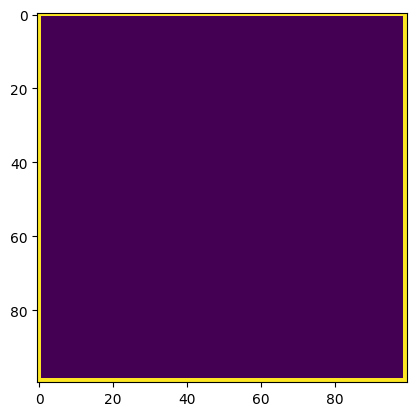

In [ ]:
# Create a boolean array to mark the edges
edge_ind = np.zeros((N, N), dtype=bool)
edge_ind[:, 0], edge_ind[:, -1], edge_ind[0, :], edge_ind[-1, :] = True, True, True, True

plt.imshow(edge_ind)

In [29]:
diagonals = [-np.ones(N-1), np.ones(N-1)]
D_x = diags(diagonals, [-1, 1], shape=(N, N))

In [20]:
D = D_x.toarray()

In [23]:
D[0, :3] = [-3, 4, -1]
D[-1, -3:] = [1, -4, 3]

In [24]:
D

array([[-3.,  4., -1., ...,  0.,  0.,  0.],
       [-1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0., -1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1., -4.,  3.]])

In [31]:
eye = np.eye(N)

In [34]:
Dx = diags([-1, 1], [-1, 1], shape=(N, N))
Dx = Dx.toarray()
Dx[0, :3] = [-3, 4, -1]
Dx[-1, -3:] = [1, -4, 3]

In [35]:
start_message = "Simulation begins at {}".format(time.asctime())
len(start_message)

45

In [37]:
45-154+214-156+61-10

0

In [38]:
a = np.arange(10)

In [46]:
d2f_num[-2]

299.0139807189705